In [3]:
import pandas as pd
import quandl
df = quandl.get('WIKI/FB')
print(df.tail())

              Open    High     Low   Close      Volume  Ex-Dividend  \
Date                                                                  
2017-10-30  179.26  180.69  177.61  179.87  24179258.0          0.0   
2017-10-31  180.57  180.80  178.94  180.06  19766043.0          0.0   
2017-11-01  182.36  182.90  180.57  182.66  28922959.0          0.0   
2017-11-02  180.63  181.94  177.34  178.92  35119841.0          0.0   
2017-11-03  179.29  179.86  176.71  178.92  17572587.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2017-10-30          1.0     179.26     180.69    177.61      179.87   
2017-10-31          1.0     180.57     180.80    178.94      180.06   
2017-11-01          1.0     182.36     182.90    180.57      182.66   
2017-11-02          1.0     180.63     181.94    177.34      178.92   
2017-11-03          1.0     179.29     179.86    176.71      178.92   

    

In [5]:
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
print(df.head())


            Adj. Close     HL_PCT  PCT_change  Adj. Volume
Date                                                      
2012-05-18     38.2318  18.309366   -9.080143  573576400.0
2012-05-21     34.0300  10.755216   -6.843690  168192700.0
2012-05-22     31.0000   8.548387   -4.937136  101786600.0
2012-05-23     32.0000   3.562500    2.008288   73600000.0
2012-05-24     33.0300   4.359673    0.242792   50237200.0


In [8]:
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression


In [17]:
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)
print(df)

            Adj. Close     HL_PCT  PCT_change  Adj. Volume    label
Date                                                               
2012-05-18     38.2318  18.309366   -9.080143  573576400.0   27.100
2012-05-21     34.0300  10.755216   -6.843690  168192700.0   27.005
2012-05-22     31.0000   8.548387   -4.937136  101786600.0   27.400
2012-05-23     32.0000   3.562500    2.008288   73600000.0   27.270
2012-05-24     33.0300   4.359673    0.242792   50237200.0   28.290
2012-05-25     31.9100   5.766217   -3.009119   37149800.0   30.014
2012-05-29     28.8400  10.540915   -8.386277   78063400.0   31.410
2012-05-30     28.1900   5.995034   -1.759888   57267900.0   31.911
2012-05-31     29.6000   9.594595    3.695919  111639200.0   31.600
2012-06-01     27.7200   6.349206   -4.056486   41855500.0   31.840
2012-06-04     26.9000   4.498141   -1.102941   35230300.0   33.050
2012-06-05     25.8690   7.769918   -3.112360   42473400.0   32.060
2012-06-06     26.8100   6.154420    2.838512   

In [18]:
df.dropna(inplace=True)
X = np.array(df.drop(['label'], 1))
y = np.array(df['label'])
X = preprocessing.scale(X)
y = np.array(df['label'])
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)


In [22]:
clf = svm.SVR()
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.944896726013


In [21]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.990241099097


In [23]:
for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print(k,confidence)

linear 0.990169230913
poly 0.764506529698
rbf 0.944896726013
sigmoid 0.876546553614


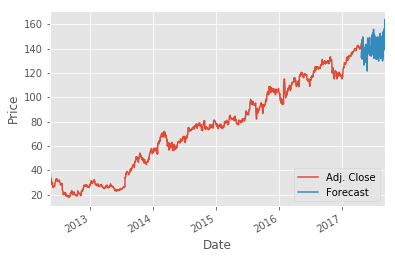

In [29]:
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
import pickle

style.use('ggplot')

df = quandl.get("WIKI/FB")
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.1 * len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
#COMMENTED OUT:
##clf = svm.SVR(kernel='linear')
##clf.fit(X_train, y_train)
##confidence = clf.score(X_test, y_test)
##print(confidence)
pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)


forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [26]:
import pickle
with open('linearregression.pickle','wb') as f:
    pickle.dump(clf, f)

In [27]:
pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)

In [30]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

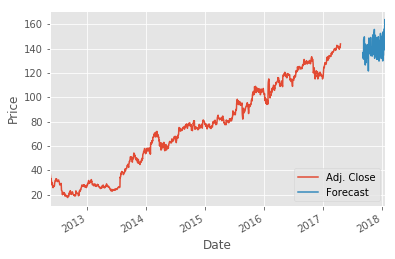

In [31]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [41]:
#print(df['Forecast'])
#print(df['Adj. Close'])
DF = df[['Date', 'Adj. Close', 'Forecast']]
print(DF)

KeyError: "['Date'] not in index"

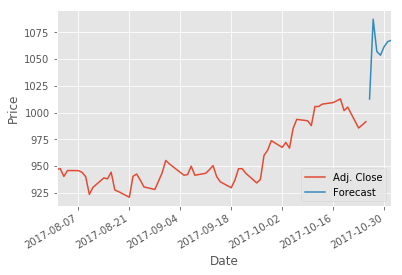

In [47]:
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime

style.use('ggplot')

df = quandl.get("WIKI/GOOGL", trim_start='2017-08-01', trim_end='2017-11-04')
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.10 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)

forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
